## Bayes Klassifikator from sklearn

von Eric Hirsch und Jonas Morsch

### Alle benötigten Bibliotheken werden geladen

In [17]:

from sklearn.naive_bayes import GaussianNB
import numpy as np 
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import random


import Data_preparation as  DP
DP=DP.Data_preparation()


### Den Datensatz laden 


In [18]:

df=DP.load_csv_to_df("ricsData_big_v5.csv")
print(df.columns)# Anzeigen aller features und Labels 

Index(['Rel_BreitGross', 'RelSpitze_oben', 'RelSpitze_unten', 'Anzahl_Linie',
       'Anzahl_Ecken', 'Anzahl_Kreis', 'innere_Konturen', 'Label'],
      dtype='object')


In [19]:
# Merkamle welche für die Klassifizierung benutzt werden sollen auswählen 
df=df[["Rel_BreitGross","RelSpitze_oben","RelSpitze_unten","Anzahl_Linie","Label"]]
X_train,X_test,y_train,y_test=DP.split_data(df,0.7)# Aufteilen der Daten in Trainings und Testdaten 
df.head()

training set size: 564 samples 
test set size: 241 samples


,Rel_BreitGross,RelSpitze_oben,RelSpitze_unten,Anzahl_Linie,Label
0,0.288606,0.074919,0.618893,6,0
1,0.494050,0.685185,0.634259,5,0
2,0.497540,0.986384,0.989410,15,0
3,0.480687,0.714286,0.592262,21,0
4,0.322937,0.159763,0.633136,21,0


### Erstellen und trainieren des Naiven Bayes Modell

In [20]:

gnb = GaussianNB()  #Initialisieren des Models  
y_pred = gnb.fit(X_train.values,y_train.values.ravel()).predict(X_test.values) # Trainiern des Models 



### Ausgeben der Metrics 

              precision    recall  f1-score   support

           0       0.66      0.33      0.44        82
           1       0.49      0.80      0.61        83
           2       0.58      0.50      0.54        76

    accuracy                           0.54       241
   macro avg       0.58      0.54      0.53       241
weighted avg       0.58      0.54      0.53       241

Confusion matrix
[[27 41 14]
 [ 3 66 14]
 [11 27 38]]


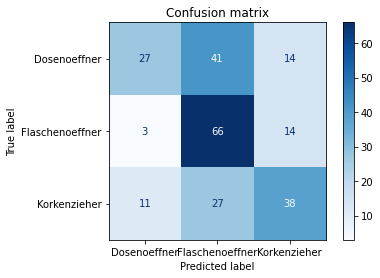

In [21]:
print(metrics.classification_report(y_test,y_pred))
np.set_printoptions(precision=2) # nur zwei nachkoma Stellen anzeigen 
class_names=["Dosenoeffner","Flaschenoeffner","Korkenzieher"]# Namen der Klassen 

### erzeugen einer Konfusionsmatrix
disp = ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test.values,
    y_test.values,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")

print("Confusion matrix")
print(disp.confusion_matrix)










### Ein einzelnes Bild vorhersagen

In [22]:
random_index=random.randint(0,len(X_test)) # ein Index im Bereich 0 länge der Testdaten wählen 
prediction=gnb.predict(X_test.values[random_index].reshape(1,-1))# ein zufälligesd Bild Vorhersagen 
print("Class predictet by Naive Bayes: {}".format(prediction))
print("actual Class: {} ".format(y_test.iloc[random_index,:]))

Class predictet by Naive Bayes: [1]
actual Class: Label    2
Name: 602, dtype: int64 
